1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [5]:
import pandas as pd

def analyze_top_100_values():
    data = pd.read_csv('open_rank_20236.csv', names=['item', 'rank', 'value', 'rankDelta', 'valueDelta'])

    data['rank'] = pd.to_numeric(data['rank'], errors='coerce')
    data['value'] = pd.to_numeric(data['value'], errors='coerce')

    data = data.dropna(subset=['rank', 'value'])

    top_100 = data.nsmallest(100, 'rank')

    value_stats = {
        "max": top_100['value'].max(),
        "min": top_100['value'].min(),
        "mean": top_100['value'].mean(),
        "median": top_100['value'].median()
    }

    print("排名前100项目的value统计：")
    print(f"最大值: {value_stats['max']}")
    print(f"最小值: {value_stats['min']}")
    print(f"均值: {value_stats['mean']}")
    print(f"中位数: {value_stats['median']}")

analyze_top_100_values()

排名前100项目的value统计：
最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [6]:
import pandas as pd

def analyze_top_10_growth_rate():
    data = pd.read_csv('activity_2022.csv')
    
    growth_rates = []
    for index, row in data.iterrows():
        monthly_values = row[1:].astype(float).values 
        rates = [(monthly_values[i] - monthly_values[i - 1]) / monthly_values[i - 1]
                 for i in range(1, len(monthly_values)) if monthly_values[i - 1] != 0]
        avg_rate = sum(rates) / len(rates) if rates else 0
        growth_rates.append(avg_rate)
    
    data['avg_growth_rate'] = growth_rates
    top_10 = data.nsmallest(10, 'avg_growth_rate')
    
    print("排名前十的项目及其平均增长率：")
    for index, row in top_10.iterrows():
        print(f"项目: {row['repo']}, 平均增长率: {row['avg_growth_rate']:.4f}")
        
analyze_top_10_growth_rate()

排名前十的项目及其平均增长率：
项目: dotnet/runtime, 平均增长率: -0.0228
项目: MicrosoftDocs/azure-docs, 平均增长率: -0.0179
项目: flutter/flutter, 平均增长率: -0.0124
项目: rust-lang/rust, 平均增长率: -0.0038
项目: elastic/kibana, 平均增长率: -0.0037
项目: NixOS/nixpkgs, 平均增长率: 0.0003
项目: home-assistant/core, 平均增长率: 0.0085
项目: pytorch/pytorch, 平均增长率: 0.0132
项目: microsoft/vscode, 平均增长率: 0.0229
项目: firstcontributions/first-contributions, 平均增长率: 0.1408


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [8]:
import pandas as pd

def compare_china_global_stats():
    china_data = pd.read_csv('china_2022.csv')
    global_data = pd.read_csv('global_2022.csv')

    metric_columns = ['issue_comment', 'open_issue', 'open_pull', 
                      'review_comment', 'merged_pull', 'value', 
                      'rankDelta', 'valueDelta']

    stats_comparison = {}
    
    for col in metric_columns:
        china_stats = {
            'mean': china_data[col].mean(),
            'median': china_data[col].median(),
            'std_dev': china_data[col].std(),
            'min': china_data[col].min(),
            'max': china_data[col].max()
        }

        global_stats = {
            'mean': global_data[col].mean(),
            'median': global_data[col].median(),
            'std_dev': global_data[col].std(),
            'min': global_data[col].min(),
            'max': global_data[col].max()
        }
        
        stats_comparison[col] = {
            'china': china_stats,
            'global': global_stats
        }

    print("中国与全球企业统计指标差异比较：")
    for col, stats in stats_comparison.items():
        print(f"\n指标: {col}")
        print(f"  中国 ：平均值: {stats['china']['mean']:.2f}, 中位数: {stats['china']['median']:.2f}, 标准差: {stats['china']['std_dev']:.2f}, 最小值: {stats['china']['min']:.2f}, 最大值: {stats['china']['max']:.2f}")
        print(f"  全球 ：平均值: {stats['global']['mean']:.2f}, 中位数: {stats['global']['median']:.2f}, 标准差: {stats['global']['std_dev']:.2f}, 最小值: {stats['global']['min']:.2f}, 最大值: {stats['global']['max']:.2f}")

# 调用函数
compare_china_global_stats()

中国与全球企业统计指标差异比较：

指标: issue_comment
  中国 ：平均值: 61205.50, 中位数: 39141.00, 标准差: 49332.49, 最小值: 11741.00, 最大值: 167814.00
  全球 ：平均值: 341409.40, 中位数: 178629.00, 标准差: 422610.26, 最小值: 78530.00, 最大值: 1437317.00

指标: open_issue
  中国 ：平均值: 9169.20, 中位数: 6889.50, 标准差: 6810.65, 最小值: 752.00, 最大值: 22397.00
  全球 ：平均值: 43300.20, 中位数: 21648.00, 标准差: 54001.07, 最小值: 13162.00, 最大值: 189185.00

指标: open_pull
  中国 ：平均值: 16912.70, 中位数: 15953.00, 标准差: 10068.92, 最小值: 1823.00, 最大值: 35266.00
  全球 ：平均值: 83423.00, 中位数: 49103.50, 标准差: 87658.30, 最小值: 27414.00, 最大值: 309685.00

指标: review_comment
  中国 ：平均值: 19857.50, 中位数: 10851.00, 标准差: 21115.07, 最小值: 2113.00, 最大值: 60402.00
  全球 ：平均值: 120392.10, 中位数: 70433.50, 标准差: 128239.76, 最小值: 35072.00, 最大值: 456166.00

指标: merged_pull
  中国 ：平均值: 13764.10, 中位数: 13705.50, 标准差: 7692.75, 最小值: 1165.00, 最大值: 26732.00
  全球 ：平均值: 62472.00, 中位数: 33288.00, 标准差: 73265.18, 最小值: 15418.00, 最大值: 257123.00

指标: value
  中国 ：平均值: 40269.53, 中位数: 29789.24, 标准差: 30905.17, 最小值: 12033.71, 最大值: 103368.49
 

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [9]:
P_A = 0.25 
P_C_given_A = 0.85 
P_C_given_not_A = 0.10
P_not_A = 0.75  

P_C = P_C_given_A * P_A + P_C_given_not_A * P_not_A

P_A_given_C = (P_C_given_A * P_A) / P_C

print(f"已知一个项目带有 HTML/Markdown 标签，它是非软件型项目的概率是：{P_A_given_C:.4f}")

已知一个项目带有 HTML/Markdown 标签，它是非软件型项目的概率是：0.7391


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [10]:
P_A = 0.50  
P_C_given_A = 0.35 
P_C_given_not_A = 0.10 
P_not_A = 0.50 

P_C = P_C_given_A * P_A + P_C_given_not_A * P_not_A

P_A_given_C = (P_C_given_A * P_A) / P_C

print(f"已知一个项目是由 JavaScript 语言编写的，它是工具组件型项目的概率是：{P_A_given_C:.4f}")

已知一个项目是由 JavaScript 语言编写的，它是工具组件型项目的概率是：0.7778


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

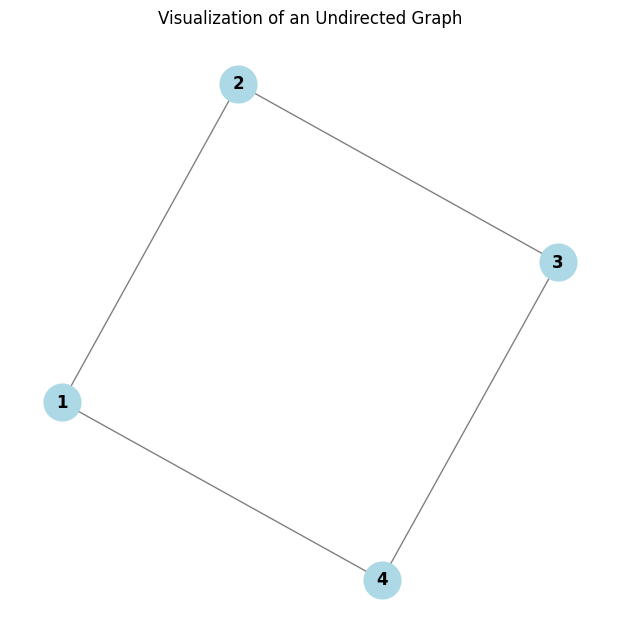

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

users = [1, 2, 3, 4]

edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

G = nx.Graph()

G.add_nodes_from(users)
G.add_edges_from(edges)

plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_size=700, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title("Visualization of an Undirected Graph")
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

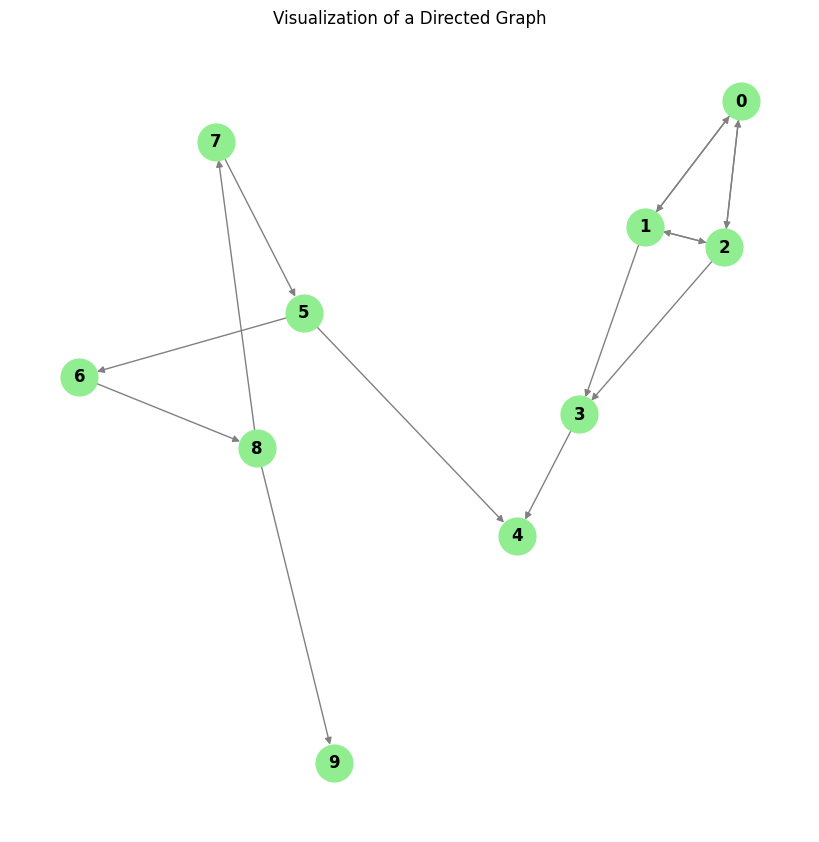

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [
    (0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
    (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
    (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)
]

G = nx.DiGraph()

G.add_nodes_from(users)
G.add_edges_from(edges)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='gray', arrows=True)
plt.title("Visualization of a Directed Graph")
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

每个节点的 PageRank 值:
节点 0: PageRank = 0.09499069584253748
节点 1: PageRank = 0.10547659652084884
节点 2: PageRank = 0.10547659652084884
节点 3: PageRank = 0.09499069584253748
节点 4: PageRank = 0.15931683334639937
节点 5: PageRank = 0.1020112395832942
节点 6: PageRank = 0.0785753675867465
节点 7: PageRank = 0.0785753675867465
节点 8: PageRank = 0.1020112395832942
节点 9: PageRank = 0.0785753675867465


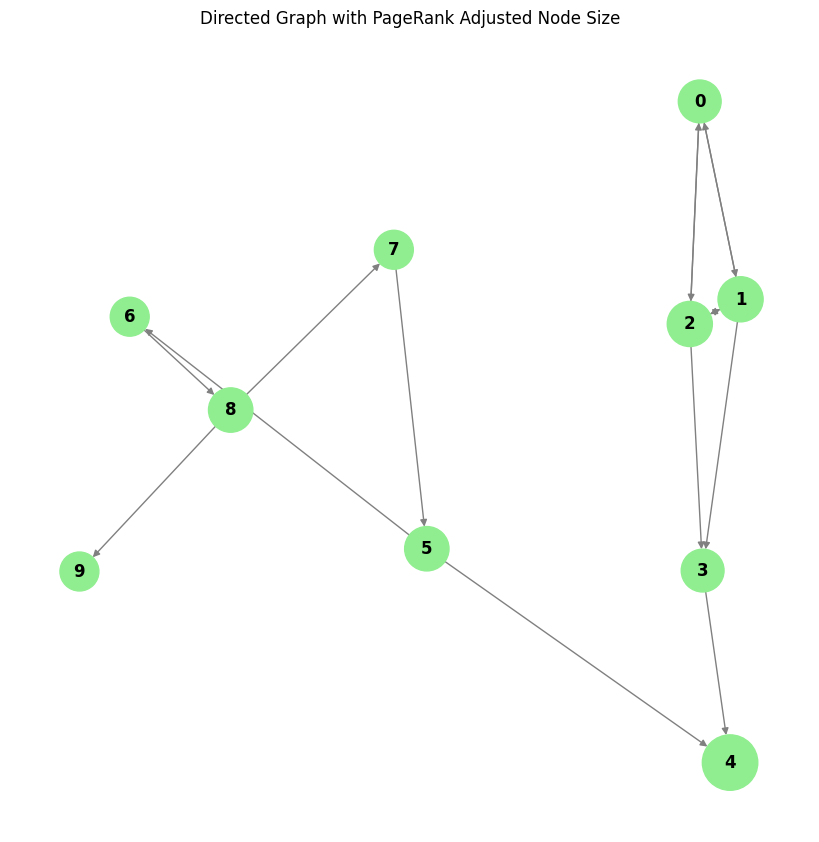

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [
    (0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
    (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
    (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)
]

G = nx.DiGraph()

G.add_nodes_from(users)
G.add_edges_from(edges)

pagerank = nx.pagerank(G, alpha=0.85) 

print("每个节点的 PageRank 值:")
for node, rank in pagerank.items():
    print(f"节点 {node}: PageRank = {rank}")

node_sizes = [v * 10000 for v in pagerank.values()] 

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='gray', arrows=True)
plt.title("Directed Graph with PageRank Adjusted Node Size")
plt.show()